In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
data = pd.read_csv("glass.csv")

In [274]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [275]:
data.shape

(214, 10)

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [277]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [278]:
data.duplicated().sum()

np.int64(1)

In [279]:
data = data.drop_duplicates()

In [280]:
data.duplicated().sum()

np.int64(0)

In [281]:
data.Type.value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

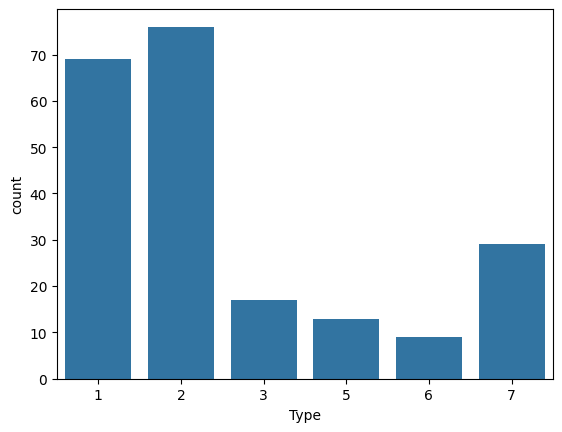

In [282]:
sns.countplot(data, x=data.Type)

10


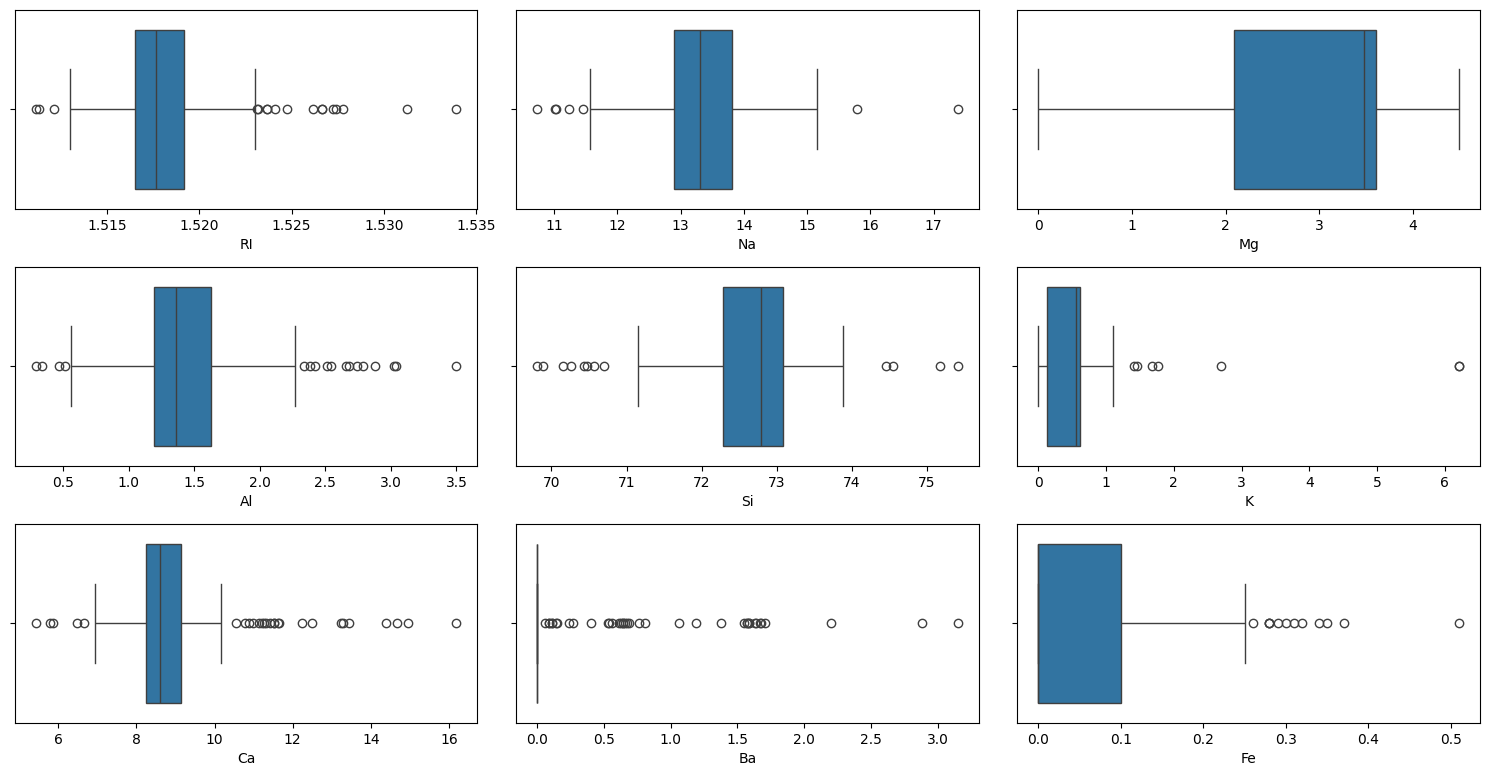

In [283]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    if i != 'Type':
        plt.subplot(4, 3, count)
        sns.boxplot(data, x=i)
        count += 1

plt.tight_layout()

In [284]:
for i in data.select_dtypes('number').columns:
    li = data[['Mg']]
    if i not in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.03), upper=data[i].quantile(0.97))

10


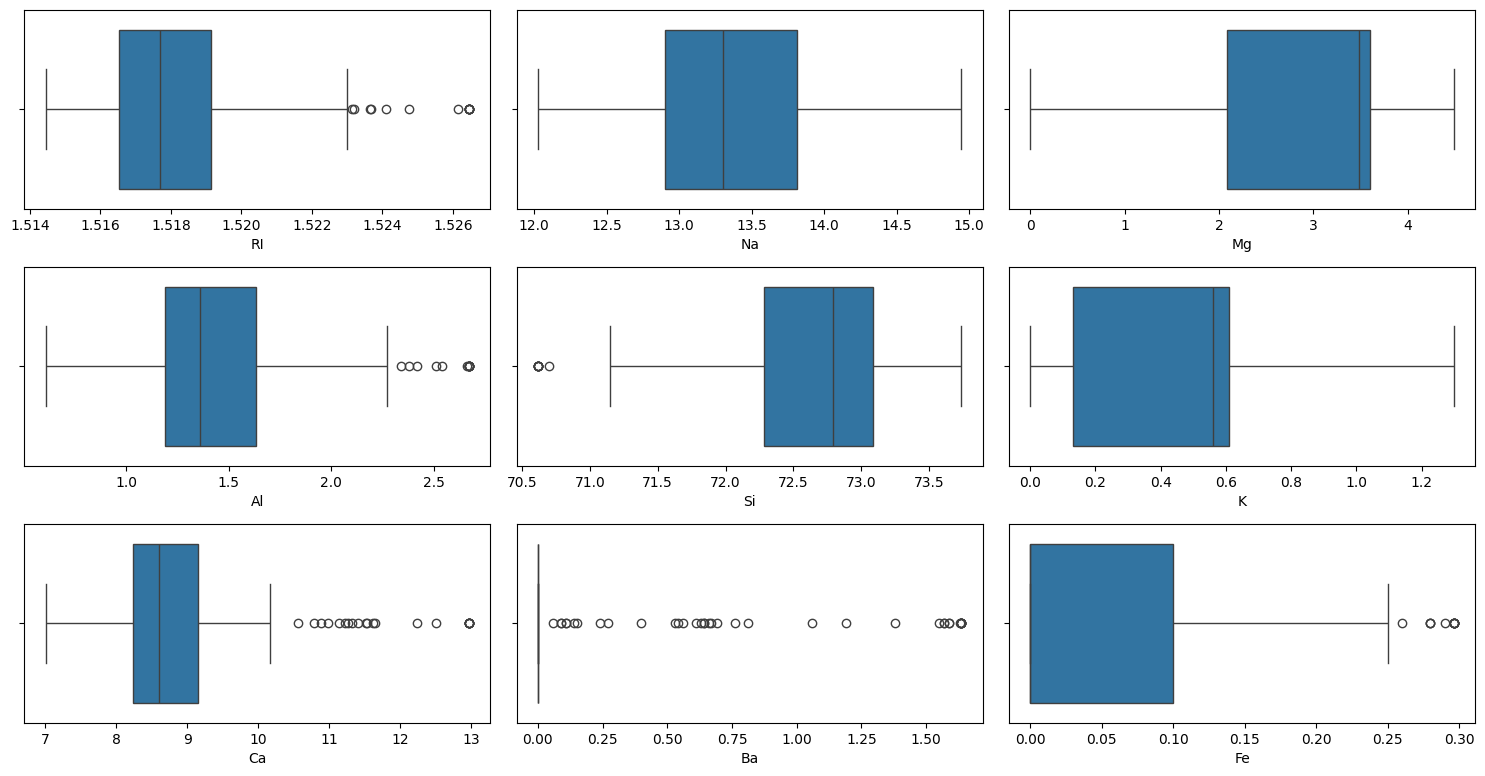

In [285]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    if i != 'Type':
        plt.subplot(4, 3, count)
        sns.boxplot(data, x=i)
        count += 1

plt.tight_layout()

In [286]:
for i in data.select_dtypes('number').columns:
    li = data[['Mg', 'Na', 'K']]
    if i not in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.05), upper=data[i].quantile(0.95))

10


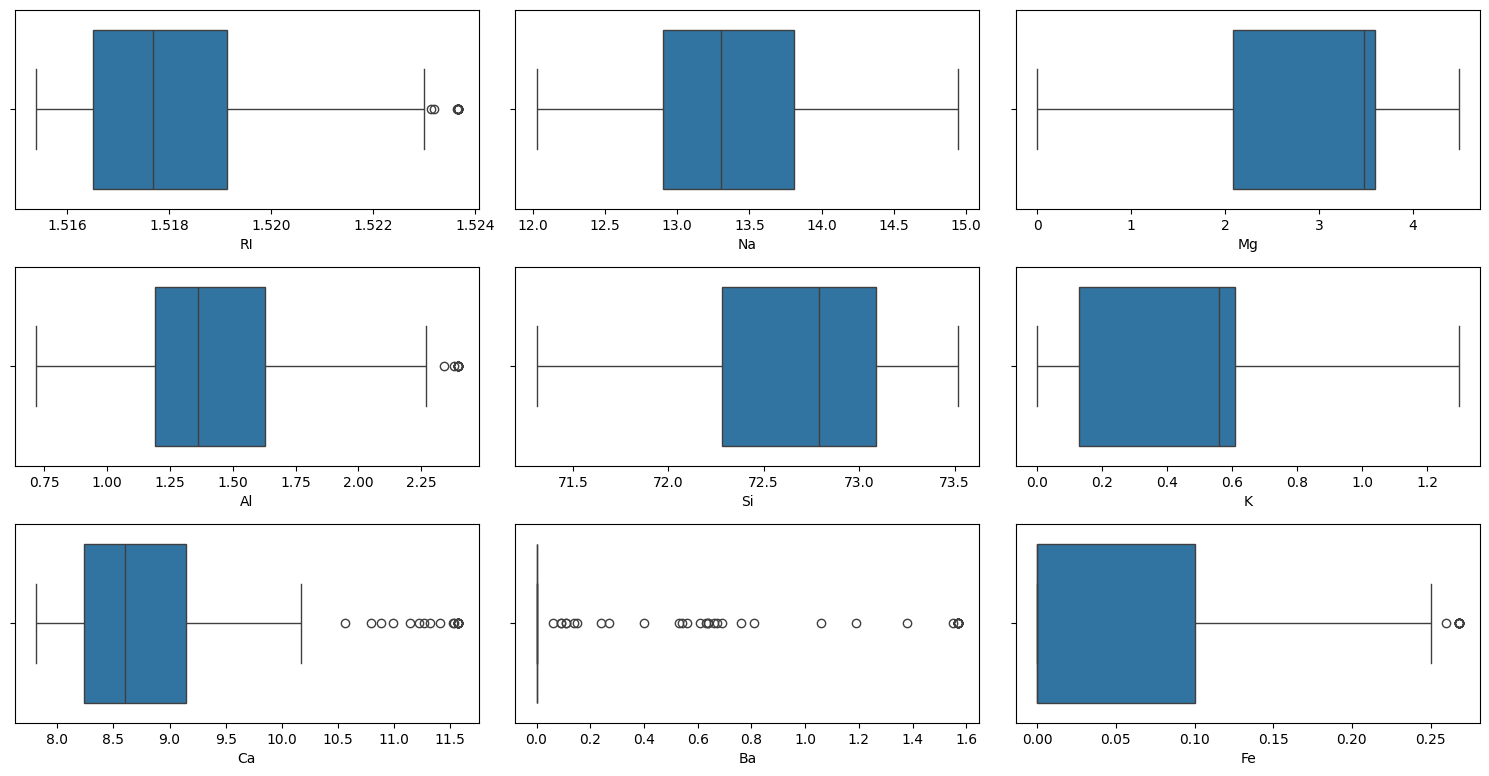

In [287]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    if i != 'Type':
        plt.subplot(4, 3, count)
        sns.boxplot(data, x=i)
        count += 1

plt.tight_layout()

In [288]:
for i in data.select_dtypes('number').columns:
    li = data[['Mg', 'Na', 'K', 'Si']]
    if i not in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.07), upper=data[i].quantile(0.93))

10


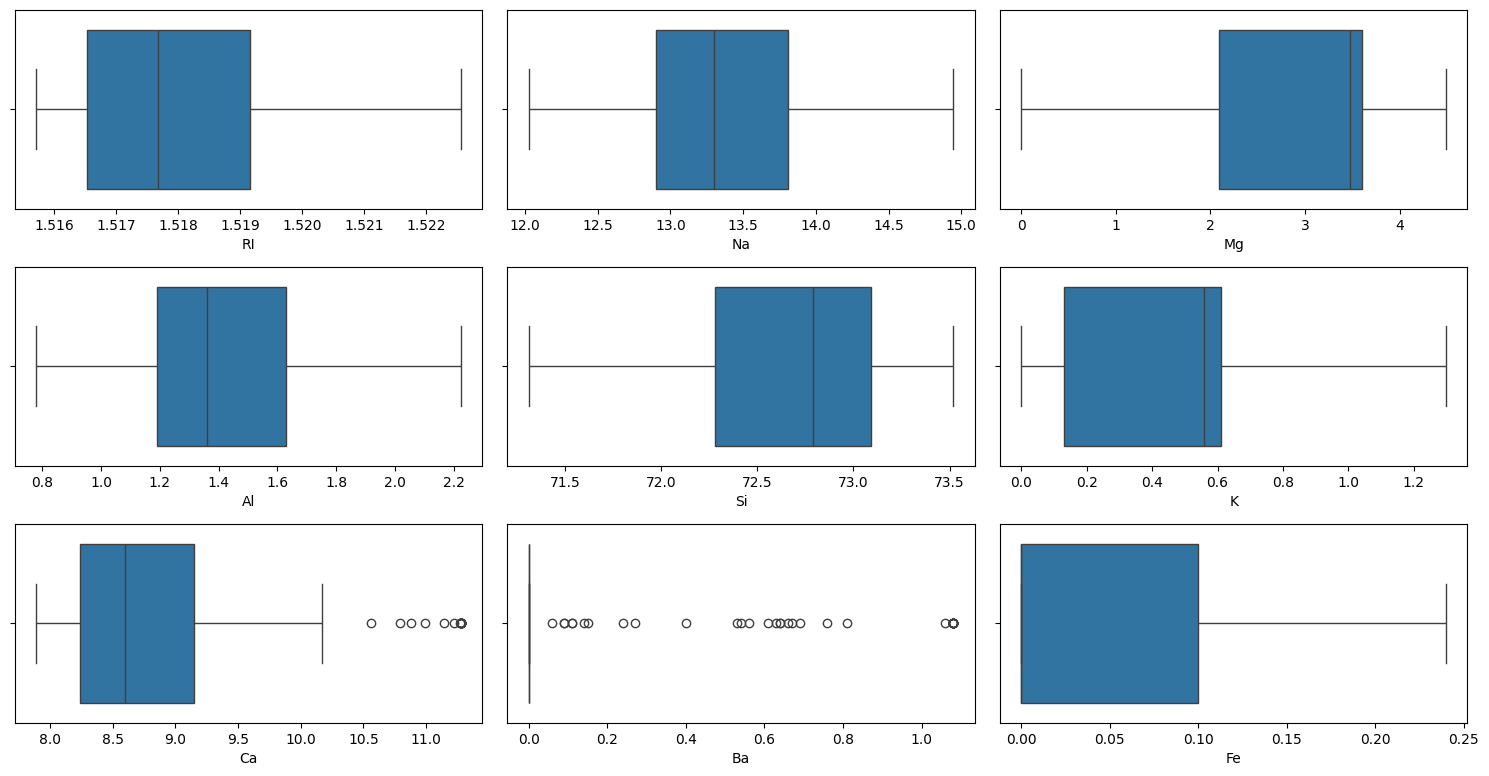

In [289]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    if i != 'Type':
        plt.subplot(4, 3, count)
        sns.boxplot(data, x=i)
        count += 1

plt.tight_layout()

In [290]:
for i in data.select_dtypes('number').columns:
    
    li = data[['Mg', 'Na', 'K', 'Si', 'RI', 'Al','Fe']]
    if i not in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.1), upper=data[i].quantile(0.9))

10


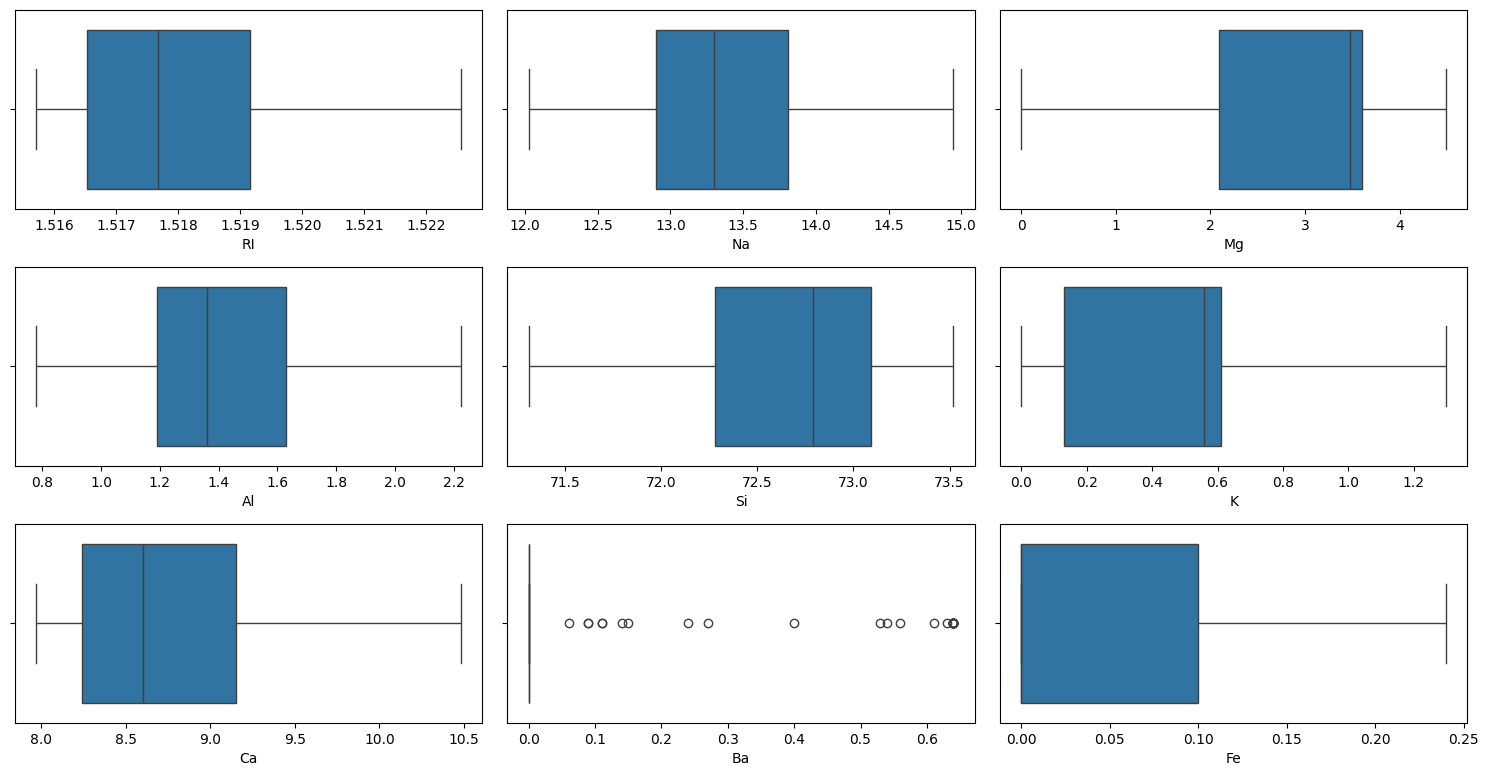

In [291]:
plt.figure(figsize=(15,10))

num_cols = len(data.select_dtypes('number').columns)
print(num_cols)

count = 1
for i in data.select_dtypes('number').columns:
    if i != 'Type':
        plt.subplot(4, 3, count)
        sns.boxplot(data, x=i)
        count += 1

plt.tight_layout()

In [292]:
data.Ba.value_counts()

Ba
0.00    175
0.64     23
0.09      2
0.11      2
0.14      1
0.27      1
0.06      1
0.15      1
0.24      1
0.40      1
0.61      1
0.53      1
0.63      1
0.56      1
0.54      1
Name: count, dtype: int64

In [293]:
x = data.drop(columns=['Ba', 'Type'])
y = data.Type

In [294]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.97,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.97,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [295]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

In [296]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [297]:
model = knn.fit(x_train, y_train)
preds = knn.predict(x_test)

In [298]:
from sklearn.metrics import f1_score, accuracy_score
f1 = f1_score(y_test, preds, average='weighted')
f1

np.float64(0.5607711369906492)

In [299]:
x_train_v, x_test_v, y_train_v, y_test_v = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [300]:
x_train_v.var(axis=0)

RI    0.000005
Na    0.478091
Mg    2.131380
Al    0.156050
Si    0.342964
K     0.097511
Ca    0.644739
Fe    0.006241
dtype: float64

In [301]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_x_train = scaler.fit_transform(x_train_v)

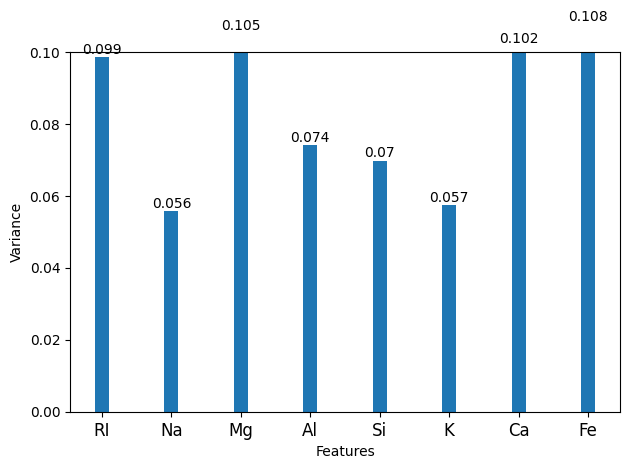

In [ ]:
fig, ax = plt.subplots()

x_value = x.columns
y_value = scaled_x_train.var(axis=0)

ax.bar(x_value,y_value,width=0.2)
ax.set_xlabel("Features")
ax.set_ylabel("Variance")
ax.set_ylim(0, 0.1)
ax.set_xticks(x_value)
ax.set_xticklabels(x_value, fontsize=12)

for i, v in enumerate(y_value):
    plt.text(x=i, y=v+0.001, s=str(round(v,3)), ha='center')

plt.tight_layout()

In [303]:
x_train_fil = x_train[['RI', 'Na', 'Ca', 'Fe','Al']]
x_test_fil = x_test[['RI', 'Na', 'Ca', 'Fe','Al']]

In [304]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [305]:
fil_model = knn.fit(x_train_fil, y_train)

In [306]:
fil_preds = fil_model.predict(x_test_fil)

In [307]:
# Prediction with filtered column
from sklearn.metrics import f1_score, accuracy_score
f1 = f1_score(y_test, fil_preds, average='weighted')
f1

np.float64(0.6304557690522604)

In [308]:
# Prediction with all the column
f1 = f1_score(y_test, preds, average='weighted')
f1

np.float64(0.5607711369906492)

In [309]:
import pickle
pickle.dump(fil_model,open(r'C:\Users\sevug\Desktop\New folder\bigdatahandson\glass_type_prediction\testing\knn_model.pkl','wb'))

In [312]:
import modulefinder

# Create a finder
finder = modulefinder.ModuleFinder()

# Run on your main script
finder.run_script("glass_type_prediction.ipynb")

print("Modules used in your project:")
for name, mod in finder.modules.items():
    print(name)

Modules used in your project:
__main__


Modules used in your project:
